In [1]:
#Ryan Fell
#Caleb Sweatt
#Jose Leos
#CSCI 185 - Web and Data Mining

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
#Reading in Data
try: os.chdir('GroupMining')    
except:
    pass

#These files have footers
df_Expend = pd.read_csv('Expenditure_Data.txt', skipfooter = 5, engine = 'python')
df_Salary = pd.read_csv('Salary_Data.txt', skipfooter = 5, engine = 'python')
df_CA = pd.read_csv('Chronic_Absent.txt', sep = '|')

#Does not contain footers
df_Test_Scores = pd.read_csv('Test_Score_Results.txt', sep = '\t')


#Updating Columns to be the same format
df_Salary.columns = df_Salary.columns.str.upper()
df_Expend.columns = df_Expend.columns.str.upper()
df_Test_Scores.columns = df_Test_Scores.columns.str.upper()
df_CA.columns = df_CA.columns.str.upper()

In [3]:
#Pre-Processing

#Data Reduction
#3 Values STEXP, DSAL, STSAL
df_Expend.drop(['SARCYEAR','C', 'D', 'S', 'STEXP'], axis = 1,inplace=True)

#3 Values BTCHSAL, MTCHSAL, HTCHSAL
df_Salary = df_Salary[['CDSCODE', 'BTCHSAL', 'MTCHSAL','HTCHSAL']]

#4 Values SELA_Y2, SMATH_Y2, DELA_Y2, DMATH_Y2
df_Test_Scores = df_Test_Scores[['CDSCODE','SELA_Y2', 'SMATH_Y2','DELA_Y2','DMATH_Y2']]

#1 Value PERSD
df_SED = pd.read_csv('Subgroup_Data.txt', usecols = ['CDSCODE', 'PERSD'])

# Values RALL, REL,RSED
df_CA = df_CA[['CDSCODE', 'RALL', 'REL', 'RSED', ]]

#Since we are looking for correlations for test scores we use NaN for missing test score
#values. When we merge, we will remove any row that has NaN values
df_Test_Scores.replace(['--','0'], np.nan, inplace=True)

#Filling in NaN values since there is a possibility there are test scores but 0 SED #students
df_SED.replace([np.nan], 0, inplace=True)

#Filling NaN values with Means
df_Expend.fillna(df_Expend.mean(numeric_only = True),inplace=True)
df_Salary.fillna(df_Salary.mean(numeric_only = True),inplace=True)

#List of all Data Frames
#Keep adding data frames to here after reduction
data_frames = [df_Expend, df_Salary, df_Test_Scores, df_SED, df_CA]

#Merging all DataFrames
df_merge = df_Expend.merge(df_Salary).merge(df_Test_Scores).merge(df_SED).merge(df_CA)

#Removing NaN values
df_merge.dropna(inplace=True)

#Normalizing attributes with values in the thousands
scaler = MinMaxScaler()

#Insert Attributes to Normalize
columns_to_normalize = ['DSAL', 'STSAL', 'BTCHSAL', 'MTCHSAL', 'HTCHSAL']

#Normalize
df_merge[columns_to_normalize] = scaler.fit_transform(df_merge[columns_to_normalize])

,CDSCODE,DSAL,STSAL,BTCHSAL,MTCHSAL,HTCHSAL,SELA_Y2,SMATH_Y2,DELA_Y2,DMATH_Y2,PERSD,RALL,REL,RSED
CDSCODE,1.000000,0.060347,-0.011851,0.074795,0.072118,0.104121,-0.006569,-0.002964,-0.001371,0.006472,-0.092118,-0.085225,-0.065527,-0.071833
DSAL,0.060347,1.000000,0.441055,0.701304,0.851891,0.883870,0.227519,0.227829,0.346227,0.315944,-0.133706,-0.122949,-0.062061,-0.101155
STSAL,-0.011851,0.441055,1.000000,0.227977,0.375399,0.402506,0.052524,0.013928,0.109177,0.031111,0.066847,0.014206,0.052986,0.004814
BTCHSAL,0.074795,0.701304,0.227977,1.000000,0.746493,0.715848,0.128169,0.134222,0.200029,0.187547,-0.111207,-0.079468,-0.036705,-0.057102
MTCHSAL,0.072118,0.851891,0.375399,0.746493,1.000000,0.829067,0.179878,0.183472,0.273260,0.254281,-0.113218,-0.116085,-0.059290,-0.097690
HTCHSAL,0.104121,0.883870,0.402506,0.715848,0.829067,1.000000,0.179836,0.177785,0.283604,0.254177,-0.132121,-0.117623,-0.073263,-0.097714
SELA_Y2,-0.006569,0.227519,0.052524,0.128169,0.179878,0.179836,1.000000,0.863551,0.677975,0.645313,-0.756458,-0.617947,-0.386212,-0.475712
SMATH_Y2,-0.002964,0.227829,0.013928,0.134222,0.183472,0.177785,0.863551,1.000000,0.668850,0.711119,-0.764334,-0.590279,-0.412761,-0.435061
DELA_Y2,-0.001371,0.346227,0.109177,0.200029,0.273260,0.283604,0.677975,0.668850,1.000000,0.948619,-0.649101,-0.392325,-0.230644,-0.262101
DMATH_Y2,0.006472,0.315944,0.031111,0.187547,0.254281,0.254177,0.645313,0.711119,0.948619,1.000000,-0.660432,-0.393967,-0.245703,-0.256047


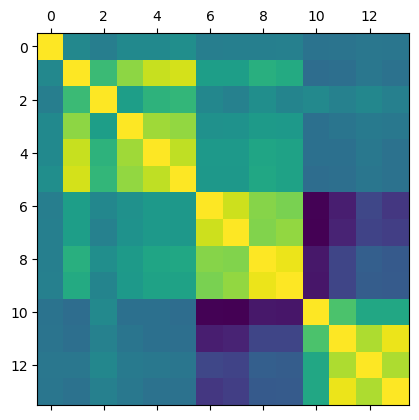

In [4]:
display(df_merge.corr())

plt.matshow(df_merge.corr())
plt.show()